In [1]:
from NeuralNetwork import *
import visualization

import numpy as np

np.random.seed(1)

In [2]:
def data_prep(data, train_ratio=0.8, print_summary=True):
    """
    :param data: data to be preprocessed
    :param train_ratio: ratio of training data
    :param print_summary: print summary of data shapes
    :return: data, x_train, y_train, y_train_raw, x_test, y_test, num_classes
    """
    data = np.random.permutation(data)
    data_train = data[:int(len(data) * train_ratio)]
    data_test = data[int(len(data) * train_ratio):]
    x_train = data_train[:, :-1].T
    y_train_raw = data_train[:, -1]
    x_test = data_test[:, :-1].T
    y_test = data_test[:, -1]
    num_classes = len(np.unique(y_train_raw))

    # to one hot
    y_train = DNNClassifier.to_one_hot(y_train_raw, num_classes)
    y_test = y_test.reshape(1, y_test.shape[0])
    if print_summary:
        print('Number of training examples: ', x_train.shape[1])
        print('Number of testing examples: ', x_test.shape[1])
        print('------')
        print('x_train shape: ', x_train.shape)
        print('y_train shape: ', y_train.shape)
        print('x_test shape: ', x_test.shape)
        print('y_test shape: ', y_test.shape)
        print('------')
        print('Number of classes: ', num_classes)
    return x_train, y_train, y_train_raw, x_test, y_test, num_classes

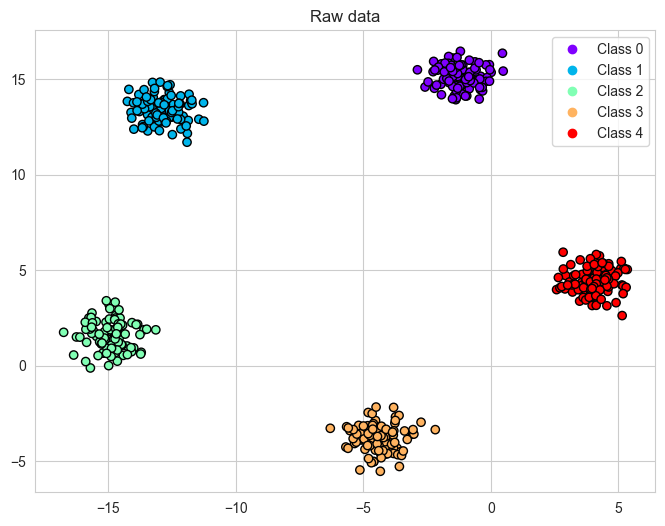

In [3]:
# load data
data = np.loadtxt('tren_data1___09.txt')

visualization.plot_data(data, title='Raw data')

In [4]:
x_train, y_train, y_train_raw, x_test, y_test, num_classes = data_prep(data, train_ratio=0.8, print_summary=True)

Number of training examples:  400
Number of testing examples:  100
------
x_train shape:  (2, 400)
y_train shape:  (5, 400)
x_test shape:  (2, 100)
y_test shape:  (1, 100)
------
Number of classes:  5


# Multi-class classification

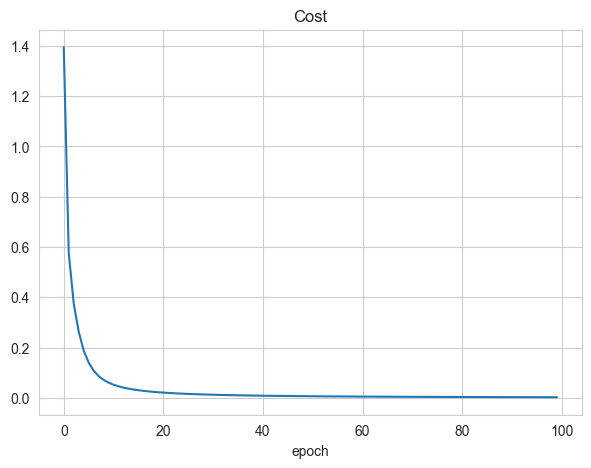

Cost after epoch 99: 0.0032542130441398968


In [5]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 12, 5]  # set layer number and sizes

nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.softmax])
costs = nn.train(x_train, y_train, learning_rate=0.006, epochs=100, batch_size=10, print_cost=True, tolerance=0.00001,
                 min_cost=0.0001)
# nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.sigmoid])
# costs = nn.train(x_train, y_train, learning_rate=0.006, epochs=100, batch_size=10, print_cost=True, tolerance=0.00001, min_cost=0.0001, cost_fun="MSE")


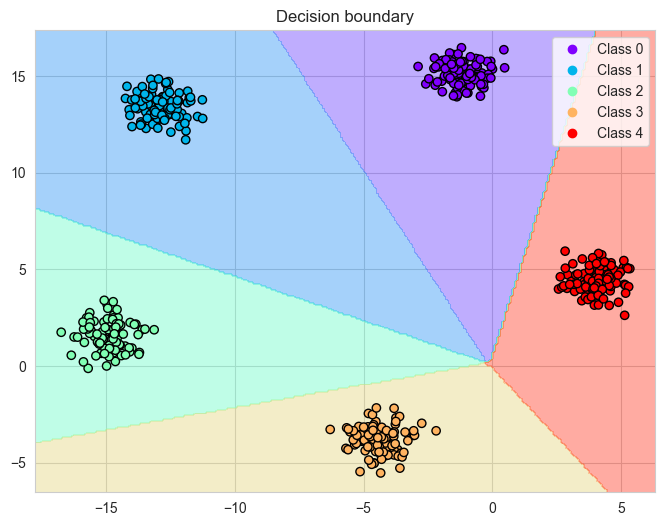

In [6]:
visualization.plot_decision_boundary(data, nn, title='Decision boundary')

accuracy:        100.0 %
confusion matrix: 


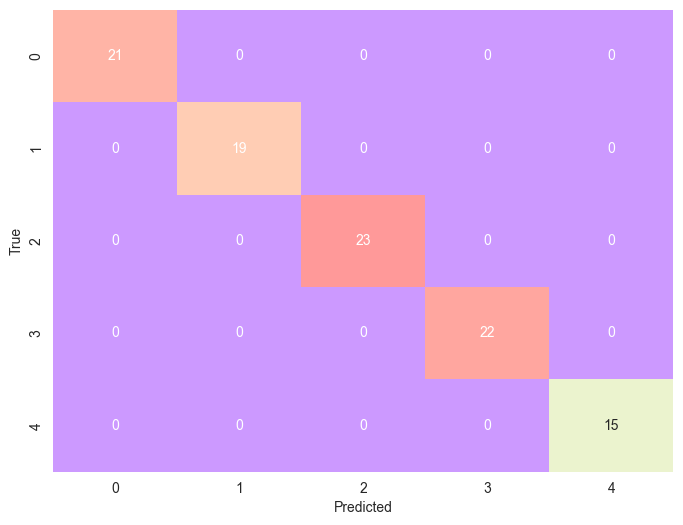

In [7]:
accuracy, confusion_matrix = nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy * 100, '%')
print('confusion matrix: ')
visualization.plot_confusion_matrix(confusion_matrix)

# One vs all

In [8]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 2, 1]  # set layer number and sizes


In [9]:
one_vs_all_nn = OneVsAllClassifier(dims, [DNNClassifier.sigmoid, DNNClassifier.sigmoid], num_classes)
# one_vs_all_nn.train(x_train, y_train_raw, learning_rate=0.06, epochs=50, batch_size=5, print_cost=True, cost_fun="MSE")
one_vs_all_nn.train(x_train, y_train_raw, learning_rate=0.06, epochs=50, batch_size=5, print_cost=True)

Training classifier 0...
Training model...
Cost after epoch 0: 0.45750671352371797
Cost after epoch 1: 0.3402705173567474
Cost after epoch 2: 0.3103477583218493
Cost after epoch 3: 0.28518037004512314
Cost after epoch 4: 0.26246707318361834
Cost after epoch 5: 0.242057160966215
Cost after epoch 6: 0.22431768561778523
Cost after epoch 7: 0.2081282510256864
Cost after epoch 8: 0.19388927531062622
Cost after epoch 9: 0.18108355379487712
Cost after epoch 10: 0.16966159852160928
Cost after epoch 11: 0.15925844796740987
Cost after epoch 12: 0.14998103969915774
Cost after epoch 13: 0.1414975348797245
Cost after epoch 14: 0.13383222196795544
Cost after epoch 15: 0.12689357055760295
Cost after epoch 16: 0.12052040101085404
Cost after epoch 17: 0.1146729963883955
Cost after epoch 18: 0.10929748302422682
Cost after epoch 19: 0.10434903444724264
Cost after epoch 20: 0.09981335060390051
Cost after epoch 21: 0.09561037205675622
Cost after epoch 22: 0.09173724540081248
Cost after epoch 23: 0.08813362

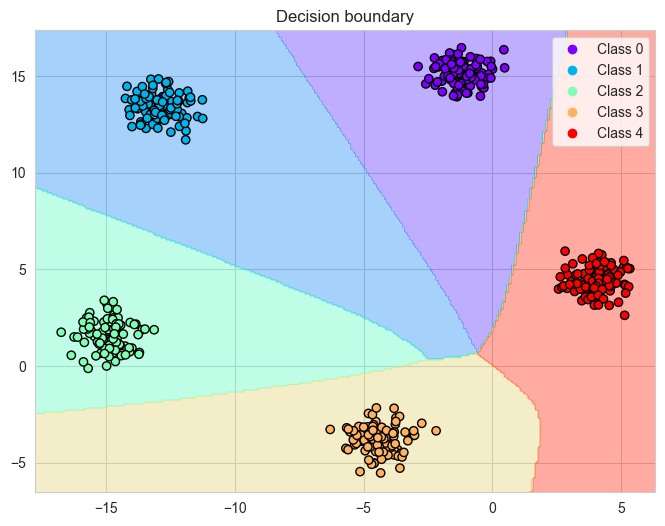

In [10]:
visualization.plot_decision_boundary(data, one_vs_all_nn, title='Decision boundary')

accuracy:        100.0 %
confusion matrix: 


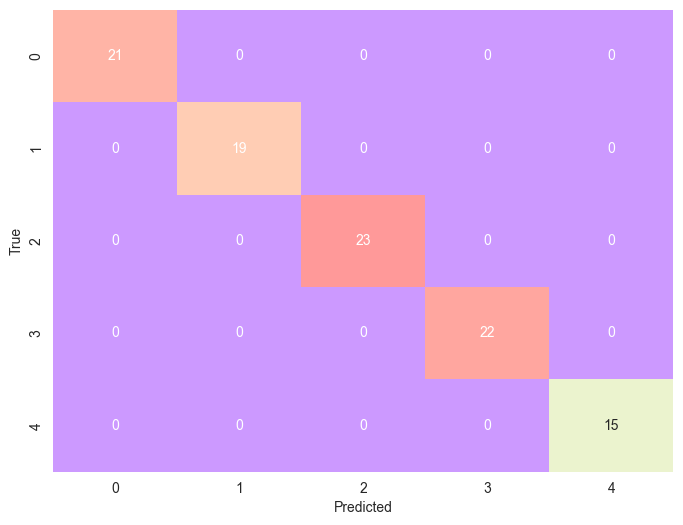

In [11]:
acc, conf = one_vs_all_nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy * 100, '%')
print('confusion matrix: ')
visualization.plot_confusion_matrix(conf)

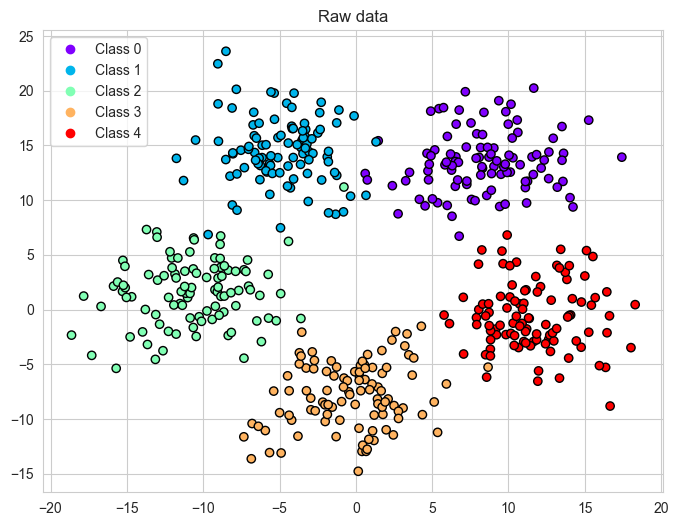

In [12]:
# load data
data = np.loadtxt('tren_data2___09.txt')

visualization.plot_data(data, title='Raw data')

In [13]:
x_train, y_train, y_train_raw, x_test, y_test, num_classes = data_prep(data, train_ratio=0.8, print_summary=True)


Number of training examples:  400
Number of testing examples:  100
------
x_train shape:  (2, 400)
y_train shape:  (5, 400)
x_test shape:  (2, 100)
y_test shape:  (1, 100)
------
Number of classes:  5


# Multi-class classification

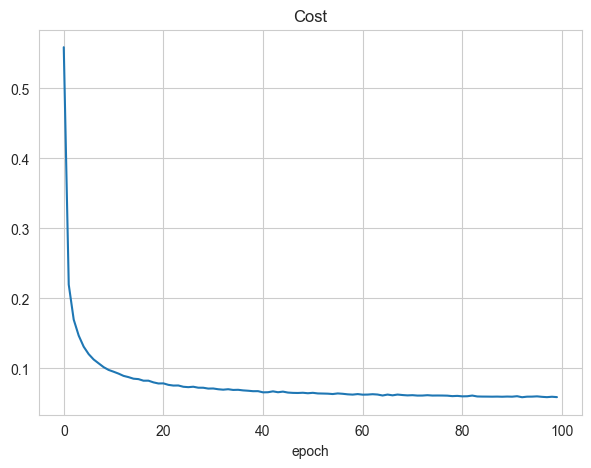

Cost after epoch 99: 0.05902740840065697


In [14]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 24, 12, 5]  # set layer number and sizes

nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.relu, DNNClassifier.softmax])
costs = nn.train(x_train, y_train, learning_rate=0.006, epochs=100, batch_size=20, print_cost=True, tolerance=0.00001,
                 min_cost=0.0001, plot_cost=True)
# nn = DNNClassifier(dims, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.sigmoid])
# costs = nn.train(x_train, y_train, learning_rate=0.006, epochs=100, batch_size=10, print_cost=True, tolerance=0.00001, min_cost=0.0001, cost_fun="MSE", plot_cost=True)

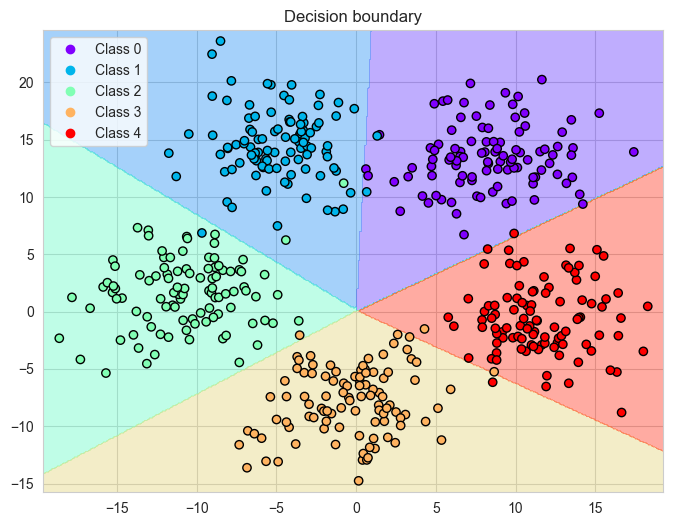

In [15]:
visualization.plot_decision_boundary(data, nn, title='Decision boundary')

accuracy:        99.0 %
confusion matrix: 


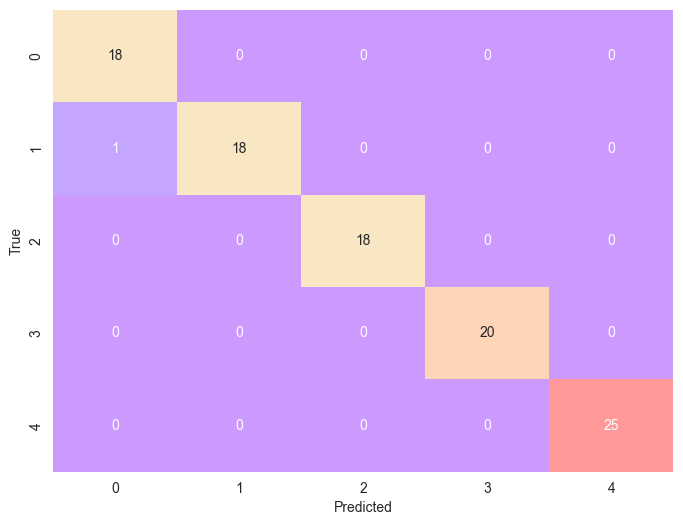

In [16]:
# accuracy, confusion_matrix = nn.evaluate(x_train, np.array(y_train_raw).reshape(1, len(y_train_raw)), confusion_matrix=True)
accuracy, confusion_matrix = nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy * 100, '%')
print('confusion matrix: ')
visualization.plot_confusion_matrix(confusion_matrix)

# One vs all

In [17]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 8, 2, 1]  # set layer number and sizes

one_vs_all_nn = OneVsAllClassifier(dims, [DNNClassifier.relu, DNNClassifier.relu, DNNClassifier.sigmoid], num_classes)
# one_vs_all_nn.train(x_train, y_train_raw, learning_rate=0.06, epochs=50, batch_size=5, print_cost=True, cost_fun="MSE")
one_vs_all_nn.train(x_train, y_train_raw, learning_rate=0.06, epochs=50, batch_size=10, print_cost=True,
                    plot_cost=False)

Training classifier 0...
Training model...
Cost after epoch 0: 0.373496432852222
Cost after epoch 1: 0.18246647310749226
Cost after epoch 2: 0.15001032715144336
Cost after epoch 3: 0.1307967328974121
Cost after epoch 4: 0.1146592057339311
Cost after epoch 5: 0.10771605679864837
Cost after epoch 6: 0.0950992191002642
Cost after epoch 7: 0.08934045575038926
Cost after epoch 8: 0.07905864576218094
Cost after epoch 9: 0.07638998687968454
Cost after epoch 10: 0.0723849863247257
Cost after epoch 11: 0.06858399547755809
Cost after epoch 12: 0.06663836336307163
Cost after epoch 13: 0.059757790261510624
Cost after epoch 14: 0.061267220222571694
Cost after epoch 15: 0.050412009670912285
Cost after epoch 16: 0.06390251775295011
Cost after epoch 17: 0.05713093961780756
Cost after epoch 18: 0.05088990311164447
Cost after epoch 19: 0.046024558229696075
Cost after epoch 20: 0.050647268543650314
Cost after epoch 21: 0.05126792548193275
Cost after epoch 22: 0.04376061646395948
Cost after epoch 23: 0.04

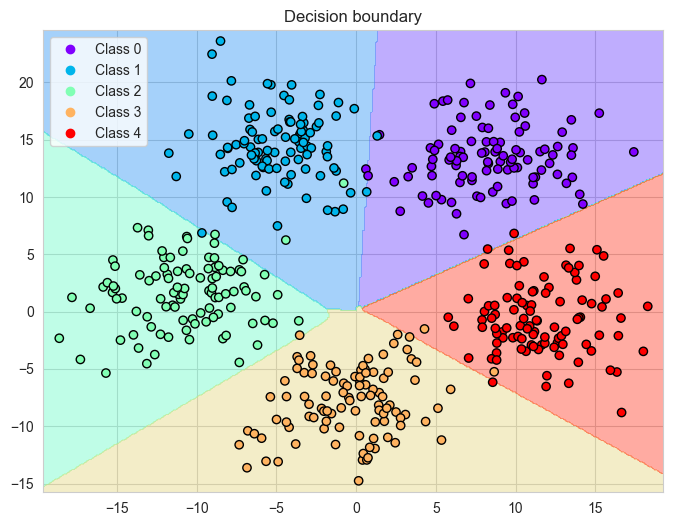

In [18]:
visualization.plot_decision_boundary(data, one_vs_all_nn, title='Decision boundary')

accuracy:        98.0 %
confusion matrix: 


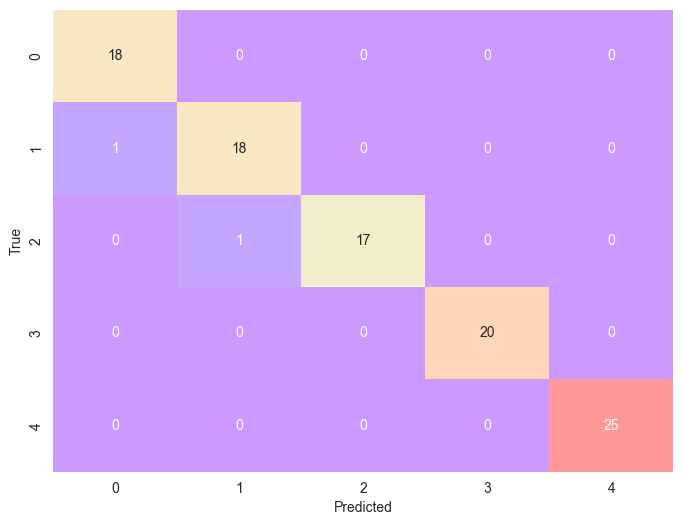

In [19]:
accuracy, confusion_matrix = one_vs_all_nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy * 100, '%')
print('confusion matrix: ')
visualization.plot_confusion_matrix(confusion_matrix)

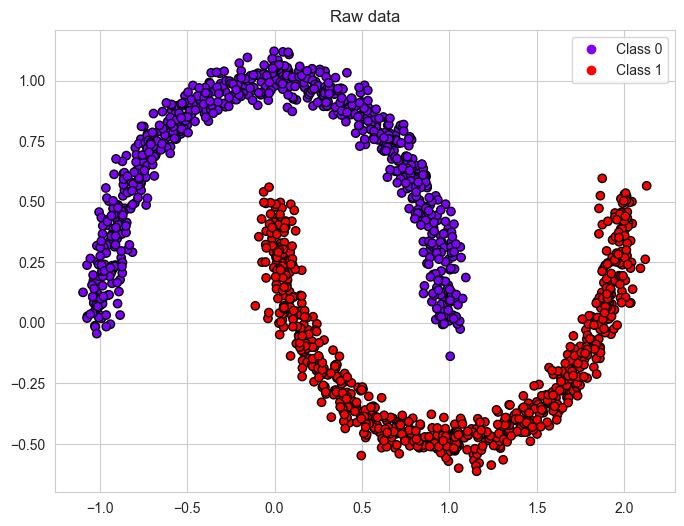

In [20]:
# load data
data = np.loadtxt('tren_data_moons.txt')

visualization.plot_data(data, title='Raw data')

In [21]:
x_train, y_train, y_train_raw, x_test, y_test, num_classes = data_prep(data, train_ratio=0.8, print_summary=True)

Number of training examples:  1200
Number of testing examples:  300
------
x_train shape:  (2, 1200)
y_train shape:  (2, 1200)
x_test shape:  (2, 300)
y_test shape:  (1, 300)
------
Number of classes:  2


In [22]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 6, 3, 1]  # set layer number and sizes
y_train_raw_reshaped = np.array(y_train_raw).reshape(1, len(y_train_raw))

nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.relu, DNNClassifier.sigmoid])
costs = nn.train(x_train, y_train_raw_reshaped, learning_rate=0.08, epochs=500, batch_size=50, print_cost=True, plot_cost=False, tolerance=0.0000001, min_cost=0.001)

Training model...
Cost after epoch 0: 0.7050606211565983
Cost after epoch 1: 0.6944938436275693
Cost after epoch 2: 0.6934681395613529
Cost after epoch 3: 0.6932574182264274
Cost after epoch 4: 0.6930797800272094
Cost after epoch 5: 0.6912251029193947
Cost after epoch 6: 0.6843872351625905
Cost after epoch 7: 0.6740424633005496
Cost after epoch 8: 0.6592854678382243
Cost after epoch 9: 0.6378001287646756
Cost after epoch 10: 0.6096454509669519
Cost after epoch 11: 0.5762494999765749
Cost after epoch 12: 0.5409975809071252
Cost after epoch 13: 0.5071677063816509
Cost after epoch 14: 0.4753674048824374
Cost after epoch 15: 0.4472980542204647
Cost after epoch 16: 0.42145717519575965
Cost after epoch 17: 0.3981231230935554
Cost after epoch 18: 0.3766662805270957
Cost after epoch 19: 0.35668822594869076
Cost after epoch 20: 0.3369756094181069
Cost after epoch 21: 0.31773806524718745
Cost after epoch 22: 0.3035690772790806
Cost after epoch 23: 0.28977999679809957
Cost after epoch 24: 0.27863

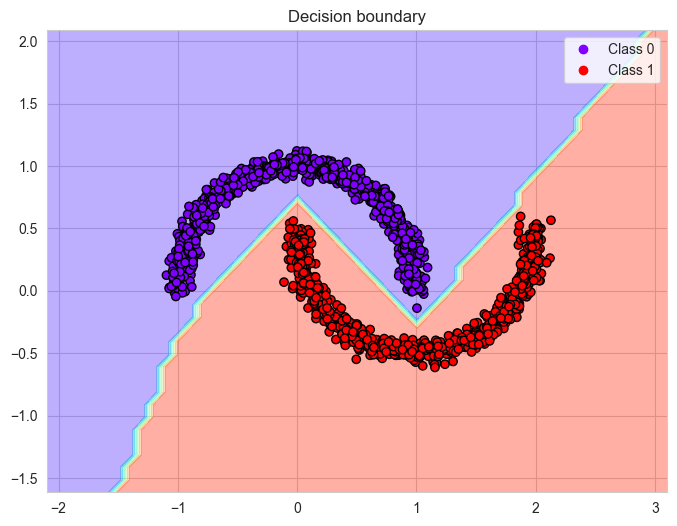

In [23]:
visualization.plot_decision_boundary(data, nn, title='Decision boundary')

In [24]:
accuracy = nn.evaluate(x_test, y_test, confusion_matrix=False)
print('accuracy:       ', accuracy * 100, '%')

accuracy:        100.0 %


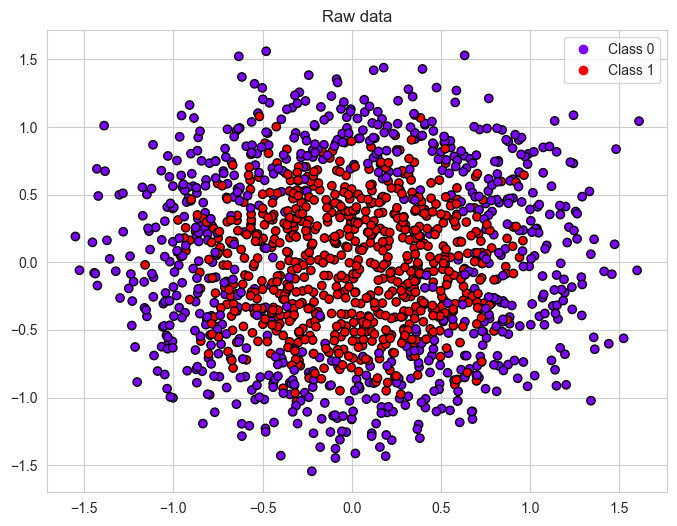

In [25]:
# load data
data = np.loadtxt('tren_data_circle.txt')

visualization.plot_data(data, title='Raw data')

In [26]:
np.random.seed(1)
x_train, y_train, y_train_raw, x_test, y_test, num_classes = data_prep(data, train_ratio=0.8, print_summary=True)

Number of training examples:  1200
Number of testing examples:  300
------
x_train shape:  (2, 1200)
y_train shape:  (2, 1200)
x_test shape:  (2, 300)
y_test shape:  (1, 300)
------
Number of classes:  2


In [27]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 6, 3, 1]  # set layer number and sizes
y_train_raw_reshaped = np.array(y_train_raw).reshape(1, len(y_train_raw))

nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.relu, DNNClassifier.sigmoid])
costs = nn.train(x_train, y_train_raw_reshaped, learning_rate=0.2, epochs=500, batch_size=50, print_cost=True, plot_cost=False, tolerance=0.0001, min_cost=0.01)

Training model...
Cost after epoch 0: 0.6841783214571743
Cost after epoch 1: 0.6764262729535563
Cost after epoch 2: 0.6684283227998863
Cost after epoch 3: 0.6621723994335783
Cost after epoch 4: 0.6560715026547108
Cost after epoch 5: 0.6494881040769851
Cost after epoch 6: 0.6415720829644532
Cost after epoch 7: 0.6309973698218697
Cost after epoch 8: 0.6174043167723534
Cost after epoch 9: 0.6027250423256197
Cost after epoch 10: 0.5888997603130699
Cost after epoch 11: 0.5758371984355904
Cost after epoch 12: 0.5652802753656821
Cost after epoch 13: 0.5531745105442446
Cost after epoch 14: 0.5438778524241198
Cost after epoch 15: 0.5317650513276387
Cost after epoch 16: 0.5225350033833366
Cost after epoch 17: 0.510084290205898
Cost after epoch 18: 0.49683214792323155
Cost after epoch 19: 0.4827509010119342
Cost after epoch 20: 0.45687951727493986
Cost after epoch 21: 0.43404140241583716
Cost after epoch 22: 0.41721515232960965
Cost after epoch 23: 0.4058597140961524
Cost after epoch 24: 0.402909

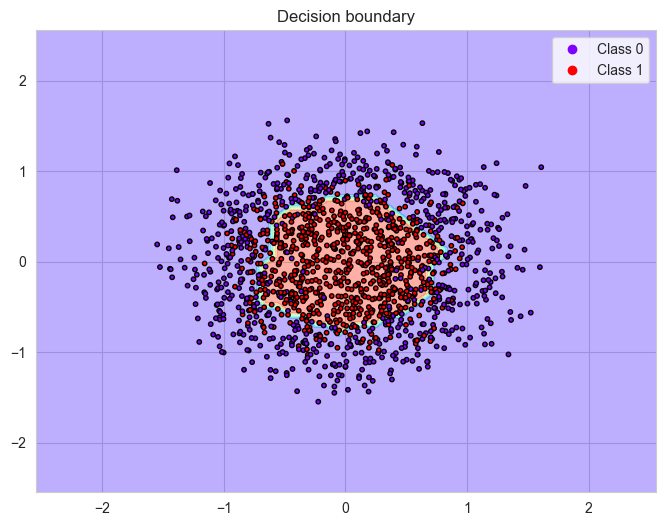

In [28]:

visualization.plot_decision_boundary(data, nn, title='Decision boundary', markersize=10)

In [29]:
accuracy = nn.evaluate(x_test, y_test, confusion_matrix=False)
print('accuracy:       ', accuracy * 100, '%')

accuracy:        82.33333333333334 %


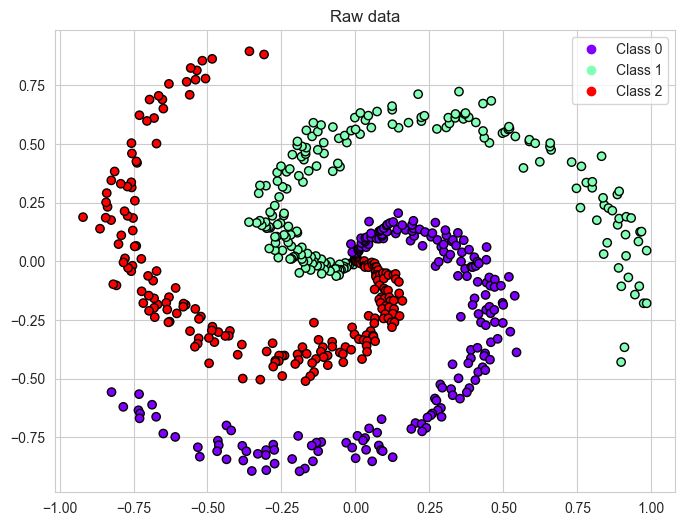

In [30]:
# load data
data = np.loadtxt('tren_data_spiral.txt')
data[:, 2] = data[:, 2] + 1 # to avoid 0 class

visualization.plot_data(data, title='Raw data')

In [31]:
np.random.seed(1)
x_train, y_train, y_train_raw, x_test, y_test, num_classes = data_prep(data, train_ratio=0.8, print_summary=True)


Number of training examples:  480
Number of testing examples:  120
------
x_train shape:  (2, 480)
y_train shape:  (3, 480)
x_test shape:  (2, 120)
y_test shape:  (1, 120)
------
Number of classes:  3


In [32]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 12, 6, 3]  # set layer number and sizes

nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.relu, DNNClassifier.softmax])
costs = nn.train(x_train, y_train, learning_rate=0.2, epochs=200, batch_size=50, print_cost=True, plot_cost=False, tolerance=0.00000001, min_cost=0.001)

Training model...
Cost after epoch 0: 1.0561497957778918
Cost after epoch 1: 1.0077884906469832
Cost after epoch 2: 0.9692802677450294
Cost after epoch 3: 0.938820149811125
Cost after epoch 4: 0.9103927131987181
Cost after epoch 5: 0.8806940997034612
Cost after epoch 6: 0.8496805589612659
Cost after epoch 7: 0.8207968546490874
Cost after epoch 8: 0.7950874908526117
Cost after epoch 9: 0.7661883024313334
Cost after epoch 10: 0.7345956382732661
Cost after epoch 11: 0.7160831333517793
Cost after epoch 12: 0.6818378244104795
Cost after epoch 13: 0.6719573807626371
Cost after epoch 14: 0.6404768022240901
Cost after epoch 15: 0.6036523199191051
Cost after epoch 16: 0.5849791186381073
Cost after epoch 17: 0.5617941949610151
Cost after epoch 18: 0.5494554298397376
Cost after epoch 19: 0.5187802652622138
Cost after epoch 20: 0.4814808934999741
Cost after epoch 21: 0.47874736034093435
Cost after epoch 22: 0.43890924341149357
Cost after epoch 23: 0.41723257018736415
Cost after epoch 24: 0.3904952

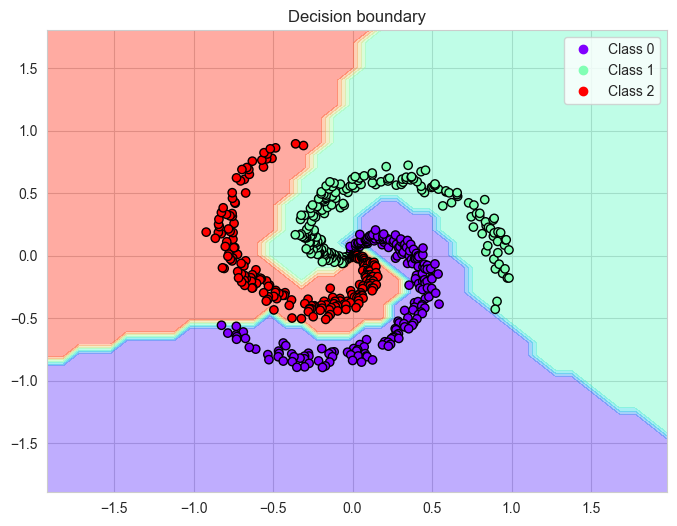

In [33]:
# temp_data = np.copy(data)
# temp_data[:, 2][data[:, 2] == 0] = 2
# temp_data[:, 2][data[:, 2] == 1] = 0
# temp_data[:, 2][data[:, 2] == 2] = 1
visualization.plot_decision_boundary(data, nn, title='Decision boundary')

In [34]:
accuracy = nn.evaluate(x_test, y_test, confusion_matrix=False)
print('accuracy:       ', accuracy * 100, '%')

accuracy:        100.0 %
